<a href="https://colab.research.google.com/github/Luisrocha1905/SSN./blob/main/Homework%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Opción 1: primer apartado, 1D

Starting Simulations at  245  different temperatures.
Simulation  1  of 245  at reduced temperature T= 2.6308292206245882
Simulation  2  of 245  at reduced temperature T= 2.890306106096818
Simulation  3  of 245  at reduced temperature T= 1.6806749384106814
Simulation  4  of 245  at reduced temperature T= 2.5767052620082023
Simulation  5  of 245  at reduced temperature T= 2.3560811741059124
Simulation  6  of 245  at reduced temperature T= 2.708957672287245
Simulation  7  of 245  at reduced temperature T= 1.8713276786573179
Simulation  8  of 245  at reduced temperature T= 2.33565995223832
Simulation  9  of 245  at reduced temperature T= 1.511616639114033
Simulation  10  of 245  at reduced temperature T= 2.173681082978201
Simulation  11  of 245  at reduced temperature T= 3.2660685254010433
Simulation  12  of 245  at reduced temperature T= 1.6374069669793172
Simulation  13  of 245  at reduced temperature T= 2.9245071415809583
Simulation  14  of 245  at reduced temperature T= 2.388451006233

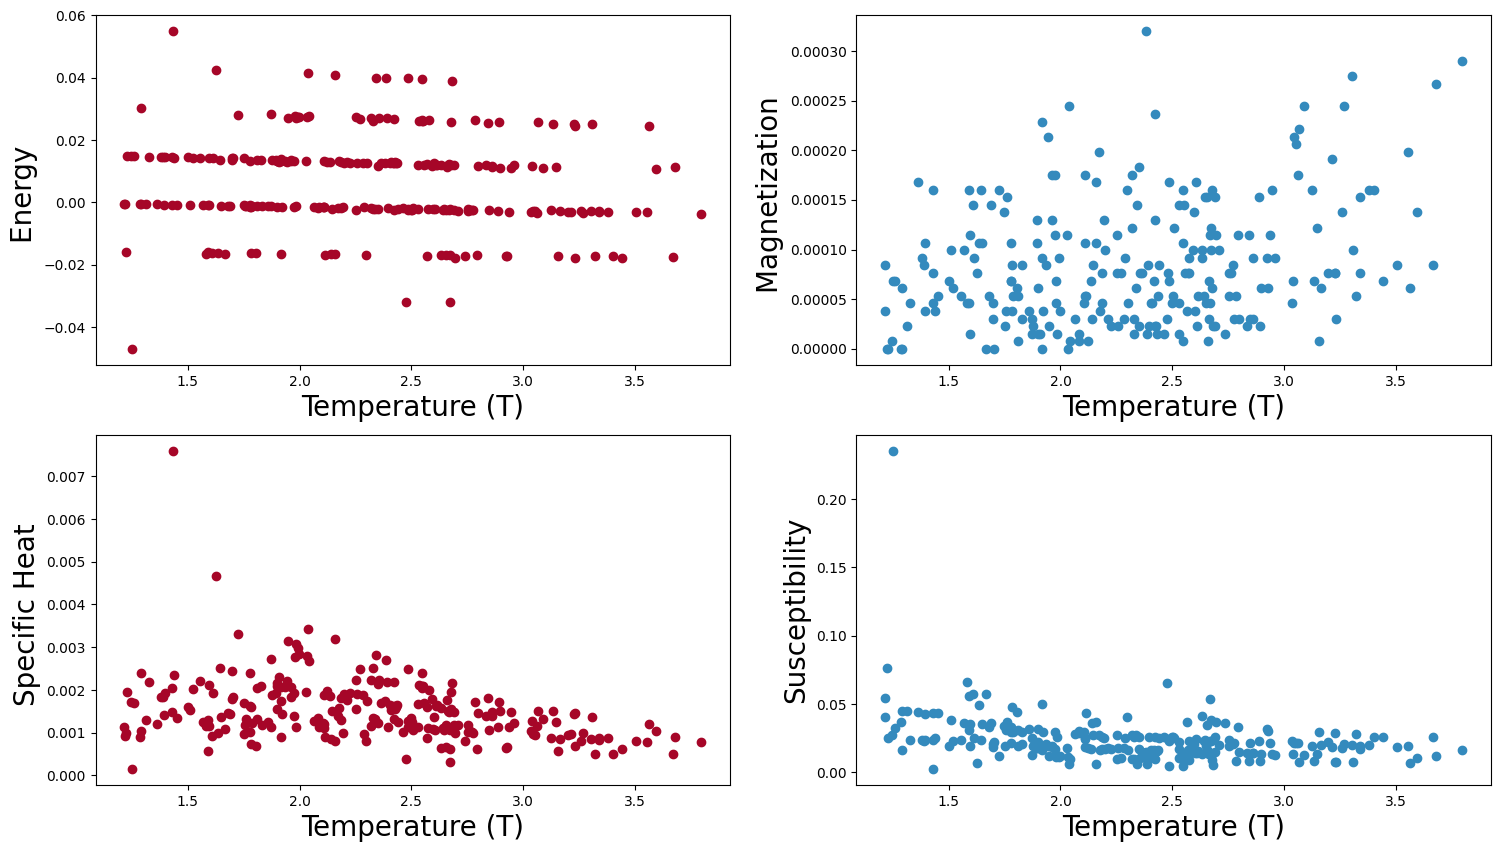

In [24]:
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

# Cambia la generación del estado inicial para que sea un vector unidimensional.
def initialstate(N):
    ''' generates a random spin configuration for initial condition'''
    state = 2*np.random.randint(0,2, size=(N))-1
    return state

# Here we define the interactions of the model (2D spin Ising model)
# and the solution method (Metropolis Monte Carlo)
def mcmove(config, beta):
    '''Monte Carlo move using Metropolis algorithm '''
    for i in range(len(config)):
        a = i
        s = config[a]
        nb = config[(a+1)%N] + config[(a-1)%N]
        cost = -2 * s * nb
        if cost < 0 or rand() < np.exp(-cost * beta):
            config[a] = -s
    return config

#This function calculates the energy of a given configuration for the plots of Energy as a function of T
def calcEnergy(config):
    '''Energy of a given configuration'''
    energy = 0
    for i in range(len(config)):
            S = config[i]
            nb = config[(i+1)%N] + config[(i-1)%N]
            energy += -nb*S
    return energy/2.

#This function calculates the magnetization of a given configuration
def calcMag(config):
    '''Magnetization of a given configuration'''
    mag = np.sum(config)
    return mag

# MAIN PROGRAM
nt      = 2**8        # number of temperature points
N       = 2**4        # size of the lattice, N x N
eqSteps = 2**10       # number of MC sweeps for equilibration
mcSteps = 2**10       # number of MC sweeps for calculation

n1, n2  = 1.0/(mcSteps*N*N), 1.0/(mcSteps*mcSteps*N*N)
#Generate a random distribution of temperatures to make an exploration
tm = 2.269;    T=np.random.normal(tm, .64, nt)
T  = T[(T>1.2) & (T<3.8)];    nt = np.size(T)
Energy       = np.zeros(nt);   Magnetization  = np.zeros(nt)
SpecificHeat = np.zeros(nt);   Susceptibility = np.zeros(nt)
#  SIMULATION LOOP
print('Starting Simulations at ',len(T),' different temperatures.')
for m in range(len(T)):
    E1 = M1 = E2 = M2 = 0
    config = initialstate(N)
    iT=1.0/T[m]
    iT2=iT*iT
    print('Simulation ',m+1,' of',len(T),' at reduced temperature T=',T[m])

    for i in range(eqSteps):         # equilibrate
        mcmove(config, iT)           # Monte Carlo moves

    for i in range(mcSteps):
        mcmove(config, iT)
        Ene = calcEnergy(config)     # calculate the energy
        Mag = calcMag(config)        # calculate the magnetisation

        E1 = E1 + Ene
        M1 = M1 + Mag
        M2 = M2 + Mag*Mag
        E2 = E2 + Ene*Ene

        Energy[m]         = n1*E1
        Magnetization[m]  = n1*M1
        SpecificHeat[m]   = (n1*E2 - n2*E1*E1)*iT2
        Susceptibility[m] = (n1*M2 - n2*M1*M1)*iT

# Plot everything

f = plt.figure(figsize=(18, 10)); # plot the calculated values

sp =  f.add_subplot(2, 2, 1 );
plt.plot(T, Energy, 'o', color="#A60628");
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Energy ", fontsize=20);

sp =  f.add_subplot(2, 2, 2 );
plt.plot(T, abs(Magnetization), 'o', color="#348ABD");
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Magnetization ", fontsize=20);

sp =  f.add_subplot(2, 2, 3 );
plt.plot(T, SpecificHeat, 'o', color="#A60628");
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Specific Heat ", fontsize=20);

sp =  f.add_subplot(2, 2, 4 );
plt.plot(T, Susceptibility, 'o', color="#348ABD");
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Susceptibility", fontsize=20);
plt.show()

Opcion 1. Segundo apartado, material antiferromagnetico

Starting Simulations at  241  different temperatures.
Simulation  1  of 241  at reduced temperature T= 1.2581688047941295
Simulation  2  of 241  at reduced temperature T= 2.8636131872864565
Simulation  3  of 241  at reduced temperature T= 1.3993675266785583
Simulation  4  of 241  at reduced temperature T= 2.5169745648926867
Simulation  5  of 241  at reduced temperature T= 2.4183271459003666
Simulation  6  of 241  at reduced temperature T= 2.162724485172386
Simulation  7  of 241  at reduced temperature T= 2.744972650070309
Simulation  8  of 241  at reduced temperature T= 1.2435968130566342
Simulation  9  of 241  at reduced temperature T= 1.9035685529287225
Simulation  10  of 241  at reduced temperature T= 2.298270631895178
Simulation  11  of 241  at reduced temperature T= 2.6112894463943643
Simulation  12  of 241  at reduced temperature T= 2.817049434963915
Simulation  13  of 241  at reduced temperature T= 2.6045628537579715
Simulation  14  of 241  at reduced temperature T= 2.8704076222

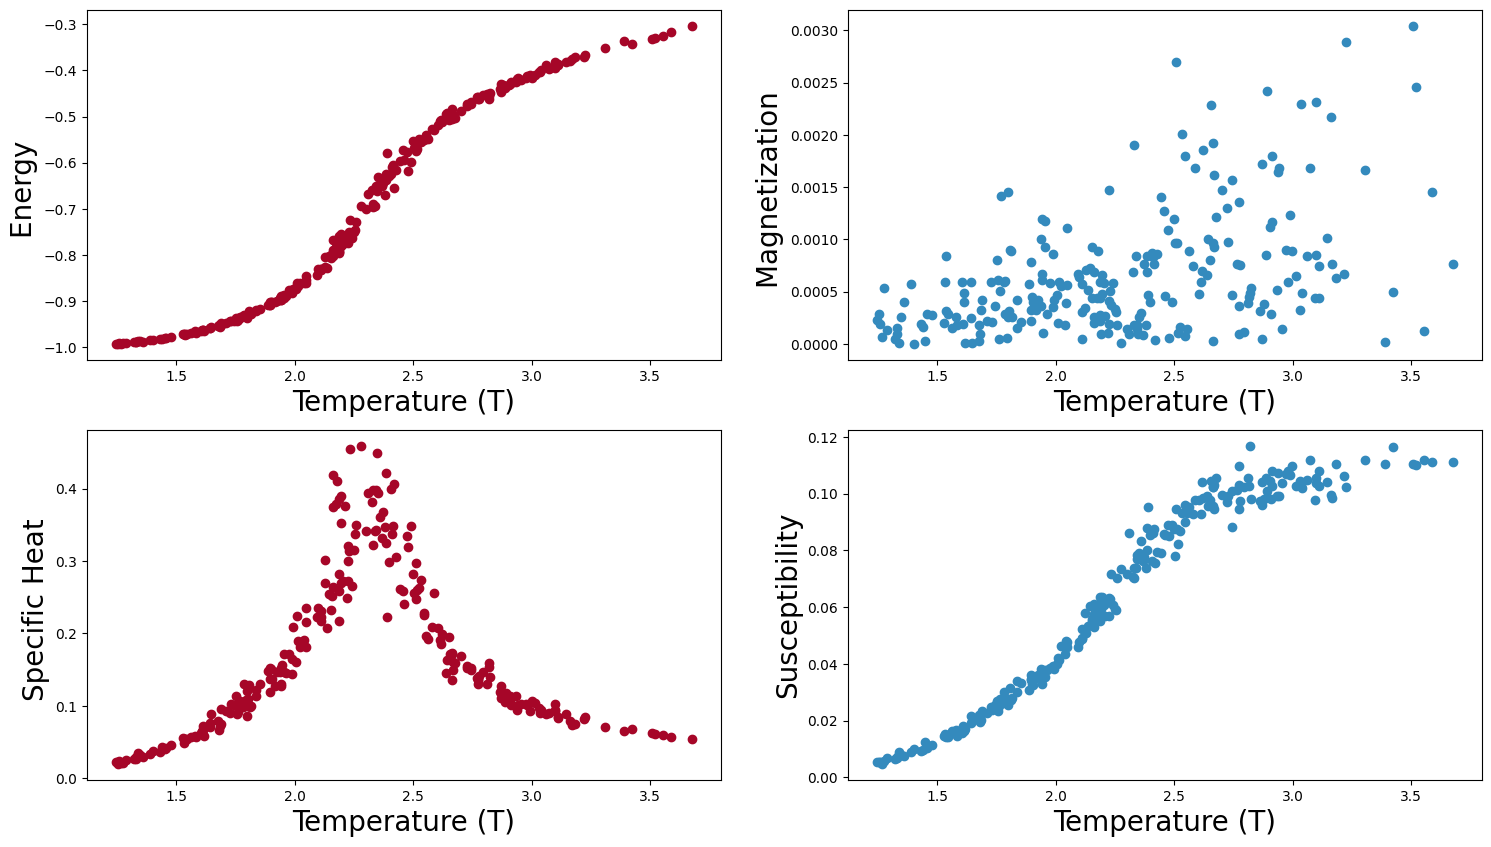

In [13]:
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

# Generation of a random initial state for NxN spins
def initialstate(N):
    state = 2 * np.random.randint(2, size=(N, N)) - 1
    return state

# Monte Carlo move using Metropolis algorithm for antiferromagnetic Ising model
def mcmove(config, beta, J=-1):
    N = config.shape[0]
    for _ in range(N * N):
        a = np.random.randint(0, N)
        b = np.random.randint(0, N)
        s = config[a, b]
        # Neighbor interaction (periodic boundary conditions)
        nb = (
            config[(a + 1) % N, b] + config[a, (b + 1) % N] +
            config[(a - 1) % N, b] + config[a, (b - 1) % N]
        )
        cost = 2 * J * s * nb
        # Flip the spin conditionally
        if cost < 0 or rand() < np.exp(-cost * beta):
            config[a, b] *= -1
    return config

# Energy calculation for antiferromagnetic interaction
def calcEnergy(config, J=-1):
    N = config.shape[0]
    energy = 0
    for i in range(N):
        for j in range(N):
            S = config[i, j]
            nb = (
                config[(i + 1) % N, j] + config[i, (j + 1) % N] +
                config[(i - 1) % N, j] + config[i, (j - 1) % N]
            )
            energy += -J * S * nb
    return energy / 4.0  # Each pair counted twice

# Magnetization calculation
def calcMag(config):
    return np.sum(config)

#
# MAIN PROGRAM
#
# Initial parameters for calculation
## change the parameter below if you want to simulate a smaller system
nt      = 2**8        # number of temperature points
N       = 2**4        # size of the lattice, N x N
eqSteps = 2**10       # number of MC sweeps for equilibration
mcSteps = 2**10       # number of MC sweeps for calculation

n1, n2  = 1.0/(mcSteps*N*N), 1.0/(mcSteps*mcSteps*N*N)
#Generate a random distribution of temperatures to make an exploration
tm = 2.269;    T=np.random.normal(tm, .64, nt)
T  = T[(T>1.2) & (T<3.8)];    nt = np.size(T)
Energy       = np.zeros(nt);   Magnetization  = np.zeros(nt)
SpecificHeat = np.zeros(nt);   Susceptibility = np.zeros(nt)
#  SIMULATION LOOP
print('Starting Simulations at ',len(T),' different temperatures.')
for m in range(len(T)):
    E1 = M1 = E2 = M2 = 0
    config = initialstate(N)
    iT=1.0/T[m]
    iT2=iT*iT
    print('Simulation ',m+1,' of',len(T),' at reduced temperature T=',T[m])

    for i in range(eqSteps):         # equilibrate
        mcmove(config, iT)           # Monte Carlo moves

    for i in range(mcSteps):
        mcmove(config, iT)
        Ene = calcEnergy(config)     # calculate the energy
        Mag = calcMag(config)        # calculate the magnetisation

        E1 = E1 + Ene
        M1 = M1 + Mag
        M2 = M2 + Mag*Mag
        E2 = E2 + Ene*Ene

        Energy[m]         = n1*E1
        Magnetization[m]  = n1*M1
        SpecificHeat[m]   = (n1*E2 - n2*E1*E1)*iT2
        Susceptibility[m] = (n1*M2 - n2*M1*M1)*iT

# Plot everything

f = plt.figure(figsize=(18, 10)); # plot the calculated values

sp =  f.add_subplot(2, 2, 1 );
plt.plot(T, Energy, 'o', color="#A60628");
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Energy ", fontsize=20);

sp =  f.add_subplot(2, 2, 2 );
plt.plot(T, abs(Magnetization), 'o', color="#348ABD");
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Magnetization ", fontsize=20);

sp =  f.add_subplot(2, 2, 3 );
plt.plot(T, SpecificHeat, 'o', color="#A60628");
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Specific Heat ", fontsize=20);

sp =  f.add_subplot(2, 2, 4 );
plt.plot(T, Susceptibility, 'o', color="#348ABD");
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Susceptibility", fontsize=20);
plt.show()

Opción 1. Tercer apartado, añadir un campo magnetico externo

In [ ]:
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
#Generation of a random initial state for NxN spins
def initialstate(N):
    ''' generates a random spin configuration for initial condition'''
    state = 2*np.random.randint(2, size=(N,N))-1
    return state
# Monte Carlo move using Metropolis algorithm with magnetic field h
def mcmove(config, beta,h):
    '''Monte Carlo move using Metropolis algorithm '''
    for i in range(N):
        for j in range(N):
                a = np.random.randint(0, N)
                b = np.random.randint(0, N)
                s =  config[a, b]
                nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
                cost = 2 * s * (nb + h)  # Added magnetic field h
                if cost < 0:
                    s *= -1
                elif rand() < np.exp(-cost*beta):
                    s *= -1
                config[a, b] = s
    return config

# Energy of a given configurationdef calcEnergy(config):
def calcEnergy(config,h):
    '''Energy of a given configuration'''
    energy = 0
    for i in range(len(config)):
        for j in range(len(config)):
            S = config[i,j]
            nb = config[(i+1)%N, j] + config[i,(j+1)%N] + config[(i-1)%N, j] + config[i,(j-1)%N]
            energy += -nb * S - h * S
    return energy/4.

#This function calculates the magnetization of a given configuration
def calcMag(config):
    '''Magnetization of a given configuration'''
    mag = np.sum(config)
    return mag


# MAIN PROGRAM

nt      = 2**8
N       = 2**4
eqSteps = 2**10
mcSteps = 2**10

n1, n2  = 1.0/(mcSteps*N*N), 1.0/(mcSteps*mcSteps*N*N)
# Magnetic field strength
h = 0.1
#Generate a random distribution of temperatures to make an exploration
tm = 2.269;    T=np.random.normal(tm, .64, nt)
T  = T[(T>1.2) & (T<3.8)];    nt = np.size(T)
Energy       = np.zeros(nt);   Magnetization  = np.zeros(nt)
SpecificHeat = np.zeros(nt);   Susceptibility = np.zeros(nt)
#  SIMULATION LOOP
print('Starting Simulations at ',len(T),' different temperatures.')
for m in range(len(T)):
    E1 = M1 = E2 = M2 = 0
    config = initialstate(N)
    iT=1.0/T[m]
    iT2=iT*iT
    print('Simulation ',m+1,' of',len(T),' at reduced temperature T=',T[m])

    for i in range(eqSteps):         # equilibrate
        mcmove(config, iT,h)           # Monte Carlo moves

    for i in range(mcSteps):
        mcmove(config, iT,h)
        Ene = calcEnergy(config,h)     # calculate the energy
        Mag = calcMag(config)        # calculate the magnetisation

        E1 = E1 + Ene
        M1 = M1 + Mag
        M2 = M2 + Mag*Mag
        E2 = E2 + Ene*Ene

        Energy[m]         = n1*E1
        Magnetization[m]  = n1*M1
        SpecificHeat[m]   = (n1*E2 - n2*E1*E1)*iT2
        Susceptibility[m] = (n1*M2 - n2*M1*M1)*iT

# Plot everything

f = plt.figure(figsize=(18, 10)); # plot the calculated values

sp =  f.add_subplot(2, 2, 1 );
plt.plot(T, Energy, 'o', color="#A60628");
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Energy ", fontsize=20);

sp =  f.add_subplot(2, 2, 2 );
plt.plot(T, abs(Magnetization), 'o', color="#348ABD");
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Magnetization ", fontsize=20);

sp =  f.add_subplot(2, 2, 3 );
plt.plot(T, SpecificHeat, 'o', color="#A60628");
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Specific Heat ", fontsize=20);

sp =  f.add_subplot(2, 2, 4 );
plt.plot(T, Susceptibility, 'o', color="#348ABD");
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Susceptibility", fontsize=20);
plt.show()

Starting Simulations at  244  different temperatures.
Simulation  1  of 244  at reduced temperature T= 3.2163019726096285
Simulation  2  of 244  at reduced temperature T= 1.9333851104591089
Simulation  3  of 244  at reduced temperature T= 1.399936128692167
Simulation  4  of 244  at reduced temperature T= 1.5393179583763894
Simulation  5  of 244  at reduced temperature T= 2.1969722408930696
Simulation  6  of 244  at reduced temperature T= 1.974079649173089
Simulation  7  of 244  at reduced temperature T= 2.775501319703435
Simulation  8  of 244  at reduced temperature T= 1.3911698354886786
Simulation  9  of 244  at reduced temperature T= 2.1546250718982467
Simulation  10  of 244  at reduced temperature T= 2.5506435407136507
Simulation  11  of 244  at reduced temperature T= 3.191473658011855
Simulation  12  of 244  at reduced temperature T= 1.769184658772712
Simulation  13  of 244  at reduced temperature T= 2.533653876369529
Simulation  14  of 244  at reduced temperature T= 2.135784602504

Opción 1. Cuarto apartado, Entropia

In [1]:
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
#Generation of a random initial state for NxN spins
def initialstate(N):
    ''' generates a random spin configuration for initial condition'''
    state = 2*np.random.randint(2, size=(N,N))-1
    return state
# Here we define the interactions of the model (2D spin Ising model)
# and the solution method (Metropolis Monte Carlo)
def mcmove(config, beta):
    '''Monte Carlo move using Metropolis algorithm '''
    for i in range(N):
        for j in range(N):
                #select random spin from NxN system
                a = np.random.randint(0, N)
                b = np.random.randint(0, N)
                s =  config[a, b]
                #calculate energy cost of this new configuration (the % is for calculation of periodic boundary condition)
                nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
                cost = 2*s*nb
                #flip spin or not depending on the cost and its Boltzmann factor
                if cost < 0:
                    s *= -1
                elif rand() < np.exp(-cost*beta):
                    s *= -1
                config[a, b] = s
    return config

#This function calculates the energy of a given configuration for the plots of Energy as a function of T
def calcEnergy(config):
    '''Energy of a given configuration'''
    energy = 0
    for i in range(len(config)):
        for j in range(len(config)):
            S = config[i,j]
            nb = config[(i+1)%N, j] + config[i,(j+1)%N] + config[(i-1)%N, j] + config[i,(j-1)%N]
            energy += -nb*S
    return energy/4.

#This function calculates the magnetization of a given configuration
def calcMag(config):
    '''Magnetization of a given configuration'''
    mag = np.sum(config)
    return mag


def calcEntropy(S0, SpecificHeat, T):
    '''Calcula la entropía usando la capacidad calorífica'''
    entropy = np.zeros(len(T))
    for i in range(1, len(T)):
        entropy[i] = entropy[i-1] + (SpecificHeat[i-1] / T[i-1]) * (T[i] - T[i-1])
    return entropy

Iniciando simulaciones en  16  diferentes temperaturas.
Simulación  1  de 16  a temperatura reducida T= 2.768029167299239
Simulación  2  de 16  a temperatura reducida T= 3.106015173944468
Simulación  3  de 16  a temperatura reducida T= 2.719476766483399
Simulación  4  de 16  a temperatura reducida T= 2.9532809628107124
Simulación  5  de 16  a temperatura reducida T= 1.1892255181920655
Simulación  6  de 16  a temperatura reducida T= 1.5841322506653197
Simulación  7  de 16  a temperatura reducida T= 2.6942538119659742
Simulación  8  de 16  a temperatura reducida T= 3.093898639929293
Simulación  9  de 16  a temperatura reducida T= 2.4178232265142534
Simulación  10  de 16  a temperatura reducida T= 2.003039164770768
Simulación  11  de 16  a temperatura reducida T= 2.7862788156800855
Simulación  12  de 16  a temperatura reducida T= 2.6216697572285343
Simulación  13  de 16  a temperatura reducida T= 1.8164446782215795
Simulación  14  de 16  a temperatura reducida T= 2.4380730247453237
Simula

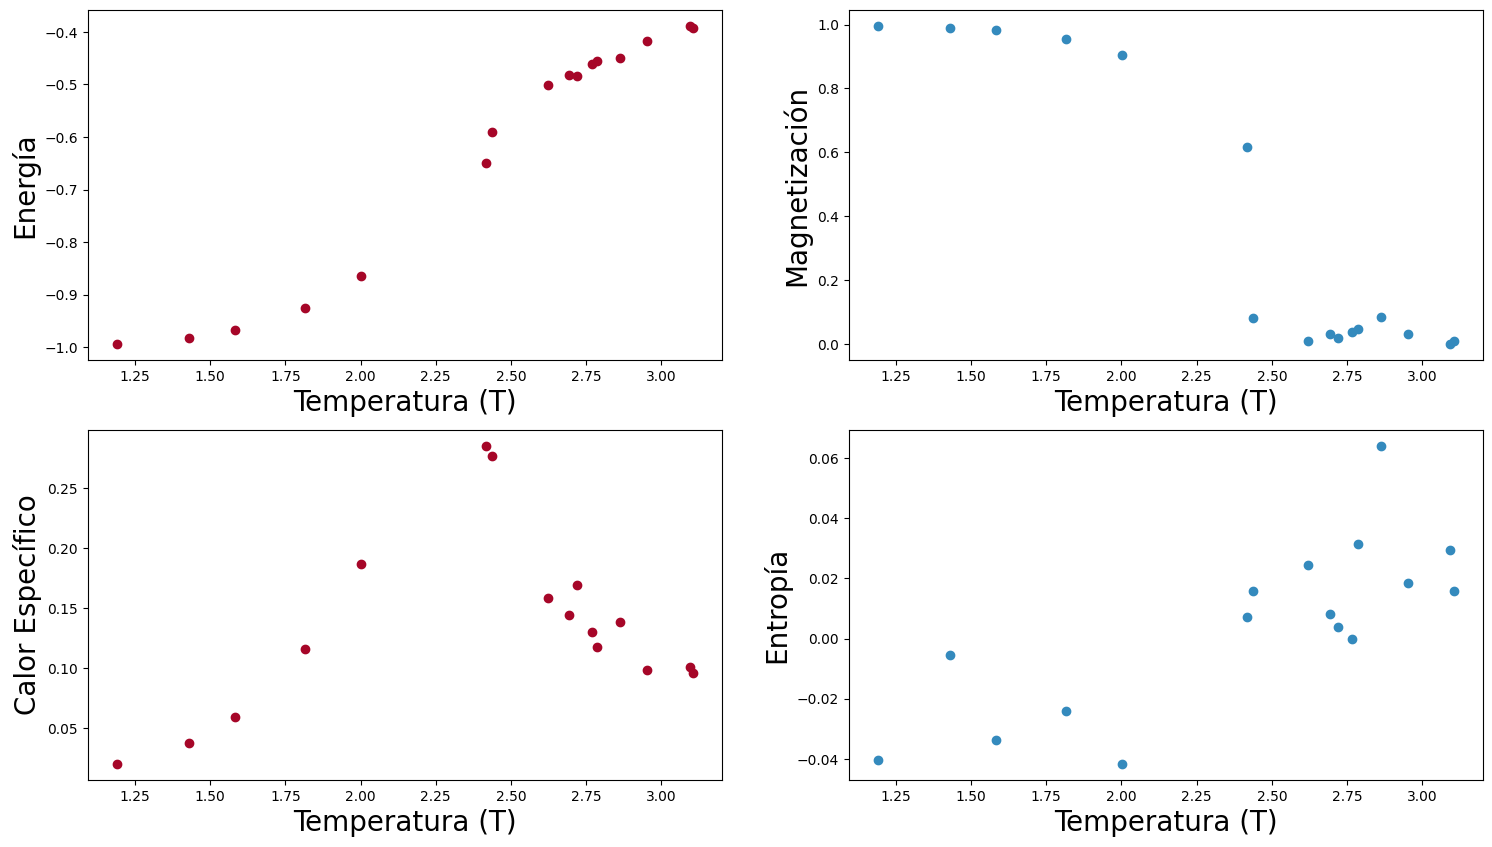

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def calcEntropy(S0, SpecificHeat, T):
    '''Calcula la entropía utilizando la capacidad calorífica.'''
    entropy = np.zeros(len(T))
    for i in range(1, len(T)):
        entropy[i] = entropy[i-1] + (SpecificHeat[i-1] / T[i-1]) * (T[i] - T[i-1])
    return entropy

# Inicializar parámetros para el cálculo
nt = 2**4        # número de puntos de temperatura
N = 2**4         # tamaño de la red, N x N
eqSteps = 2**10  # número de barridos de MC para equilibrar
mcSteps = 2**10  # número de barridos de MC para el cálculo

n1, n2 = 1.0/(mcSteps*N*N), 1.0/(mcSteps*mcSteps*N*N)
tm = 2.269
T = np.random.normal(tm, .64, nt)
T = T[(T > 0) & (T < 100)]
nt = np.size(T)

Energy       = np.zeros(nt)
Magnetization = np.zeros(nt)
SpecificHeat = np.zeros(nt)
Susceptibility = np.zeros(nt)
Entropy = np.zeros(nt)  # Define Entropy aquí como un array

#----------------------------------------------------------------------#
#  BUCLE DE SIMULACIÓN
#----------------------------------------------------------------------#
print('Iniciando simulaciones en ', len(T), ' diferentes temperaturas.')
for m in range(len(T)):
    E1 = M1 = E2 = M2 = 0
    config = initialstate(N)
    iT = 1.0/T[m]
    iT2 = iT * iT
    print('Simulación ', m+1, ' de', len(T), ' a temperatura reducida T=', T[m])

    for i in range(eqSteps):  # equilibrar
        mcmove(config, iT)      # movimientos de Monte Carlo

    for i in range(mcSteps):
        mcmove(config, iT)
        Ene = calcEnergy(config)   # calcular la energía
        Mag = calcMag(config)      # calcular la magnetización

        E1 += Ene
        M1 += Mag
        M2 += Mag * Mag
        E2 += Ene * Ene

    Energy[m] = n1 * E1
    Magnetization[m] = n1 * M1
    SpecificHeat[m] = (n1 * E2 - n2 * E1 * E1) * iT2
    Susceptibility[m] = (n1 * M2 - n2 * M1 * M1) * iT

# Calcular la entropía después de la simulación
Entropy = calcEntropy(0, SpecificHeat, T)

# Gráfica de todos los resultados
f = plt.figure(figsize=(18, 10))  # Graficar los valores calculados

sp = f.add_subplot(2, 2, 1)
plt.plot(T, Energy, 'o', color="#A60628")
plt.xlabel("Temperatura (T)", fontsize=20)
plt.ylabel("Energía", fontsize=20)

sp = f.add_subplot(2, 2, 2)
plt.plot(T, abs(Magnetization), 'o', color="#348ABD")
plt.xlabel("Temperatura (T)", fontsize=20)
plt.ylabel("Magnetización", fontsize=20)

sp = f.add_subplot(2, 2, 3)
plt.plot(T, SpecificHeat, 'o', color="#A60628")
plt.xlabel("Temperatura (T)", fontsize=20)
plt.ylabel("Calor Específico", fontsize=20)

sp = f.add_subplot(2, 2, 4)
plt.plot(T, Entropy, 'o', color="#348ABD")  # Cambiar a Entropy
plt.xlabel("Temperatura (T)", fontsize=20)
plt.ylabel("Entropía", fontsize=20)
plt.show()

Opción 1. Cuarto apartado, entropia ideal

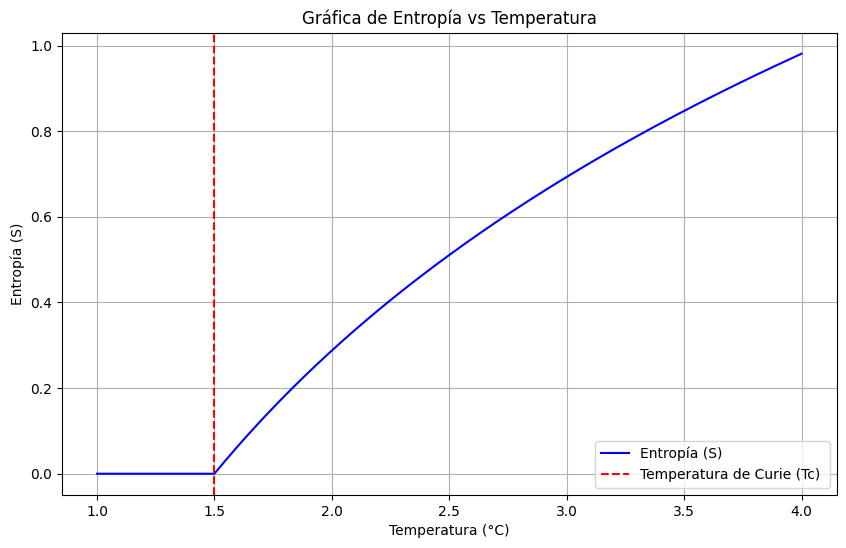

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Datos hipotéticos
temperatura = np.linspace(1, 4, 500)  # Temperaturas de 0 a 100 grados Celsius
# Utilizaremos una función ficticia para la entropía
# Ejemplo: S = k * ln(T/Tc) para T > Tc, donde Tc es la temperatura de Curie
k = 1.0  # Constante de Boltzmann (valor ficticio)
Tc = 1.5  # Temperatura de Curie en grados Celsius # Changed Tc to a single value
entropia = np.where(temperatura > Tc, k * np.log(temperatura / Tc), 0)

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(temperatura, entropia, label='Entropía (S)', color='blue')
plt.axvline(x=Tc, color='red', linestyle='--', label='Temperatura de Curie (Tc) ')
plt.title('Gráfica de Entropía vs Temperatura')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Entropía (S)')
plt.legend()
plt.grid()
plt.show()

Opción 1. Quinto apartado, criterio de convergencia

In [ ]:
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

#Generation of a random initial state for NxN spins
def initialstate(N):
    ''' generates a random spin configuration for initial condition'''
    state = 2*np.random.randint(2, size=(N,N))-1
    return state

# Here we define the interactions of the model (2D spin Ising model)
# and the solution method (Metropolis Monte Carlo)
def mcmove(config, beta):
    '''Monte Carlo move using Metropolis algorithm '''
    energy_before = calcEnergy(config)  # Calcular energía antes del movimiento
    for i in range(N):
        for j in range(N):
                #select random spin from NxN system
                a = np.random.randint(0, N)
                b = np.random.randint(0, N)
                s =  config[a, b]
                #calculate energy cost of this new configuration (the % is for calculation of periodic boundary condition)
                nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
                cost = 2*s*nb
                #flip spin or not depending on the cost and its Boltzmann factor
                ## (acceptance probability is given by Boltzmann factor with beta = 1/kBT
                if cost < 0:
                    s *= -1
                elif rand() < np.exp(-cost*beta):
                    s *= -1
                config[a, b] = s
    energy_after = calcEnergy(config)  # Calcular energía después del movimiento
    energy_change = abs(energy_after - energy_before)  # Calcular cambio en energía
    return config, energy_change

#This function calculates the energy of a given configuration for the plots of Energy as a function of T
def calcEnergy(config):
    '''Energy of a given configuration'''
    energy = 0
    for i in range(len(config)):
        for j in range(len(config)):
            S = config[i,j]
            nb = config[(i+1)%N, j] + config[i,(j+1)%N] + config[(i-1)%N, j] + config[i,(j-1)%N]
            energy += -nb*S
    return energy/4.

#This function calculates the magnetization of a given configuration
def calcMag(config):
    '''Magnetization of a given configuration'''
    mag = np.sum(config)
    return mag

#
# MAIN PROGRAM
#
# Initial parameters for calculation
## change the parameter below if you want to simulate a smaller system
nt      = 2**8        # number of temperature points
N       = 2**4        # size of the lattice, N x N
#eqSteps = 2**10       # number of MC sweeps for equilibration  (Ya no se usa)
#mcSteps = 2**10       # number of MC sweeps for calculation  (Ya no se usa)

n1, n2  = 1.0/(mcSteps*N*N), 1.0/(mcSteps*mcSteps*N*N)
#Generate a random distribution of temperatures to make an exploration
tm = 2.269;    T=np.random.normal(tm, .64, nt)
T  = T[(T>1.2) & (T<3.8)];    nt = np.size(T)

Energy       = np.zeros(nt);   Magnetization  = np.zeros(nt)
SpecificHeat = np.zeros(nt);   Susceptibility = np.zeros(nt)

threshold = 1e-4  # Definir el umbral de convergencia

#----------------------------------------------------------------------
#  SIMULATION LOOP
#----------------------------------------------------------------------
print('Starting Simulations at ',len(T),' different temperatures.')
for m in range(len(T)):
    E1 = M1 = E2 = M2 = 0
    config = initialstate(N)
    iT=1.0/T[m]
    iT2=iT*iT
    print('Simulation ',m+1,' of',len(T),' at reduced temperature T=',T[m])

    energy_change = float('inf')  # Inicializar cambio en energía a infinito
    mcSteps = 0 # Inicializar contador de pasos de Monte Carlo
    while energy_change > threshold:  # Iterar hasta que el cambio sea menor que el umbral
        config, energy_change = mcmove(config, iT)  # Actualizar config y energy_change
        Ene = calcEnergy(config)     # calculate the energy
        Mag = calcMag(config)        # calculate the magnetisation

        E1 = E1 + Ene
        M1 = M1 + Mag
        M2 = M2 + Mag*Mag
        E2 = E2 + Ene*Ene
        mcSteps += 1 # Incrementar contador de pasos de Monte Carlo

    # Actualizar los valores después de la convergencia
    n1, n2  = 1.0/(mcSteps*N*N), 1.0/(mcSteps*mcSteps*N*N) # Recalcular n1 y n2
    Energy[m]         = n1*E1
    Magnetization[m]  = n1*M1
    SpecificHeat[m]   = (n1*E2 - n2*E1*E1)*iT2
    Susceptibility[m] = (n1*M2 - n2*M1*M1)*iT

#
# Plot everything
#

f = plt.figure(figsize=(18, 10)); # plot the calculated values

sp =  f.add_subplot(2, 2, 1 );
plt.plot(T, Energy, 'o', color="#A60628");
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Energy ", fontsize=20);

sp =  f.add_subplot(2, 2, 2 );
plt.plot(T, abs(Magnetization), 'o', color="#348ABD");
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Magnetization ", fontsize=20);

sp =  f.add_subplot(2, 2, 3 );
plt.plot(T, SpecificHeat, 'o', color="#A60628");
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Specific Heat ", fontsize=20);

sp =  f.add_subplot(2, 2, 4 );
plt.plot(T, Susceptibility, 'o', color="#348ABD");
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Susceptibility", fontsize=20);
plt.show()

Opción 1. Quinto apartado, criterio de convergencia ajustado

In [ ]:
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

#----------------------------------------------------------------------
##  BLOCK OF FUNCTIONS USED IN THE MAIN CODE
#----------------------------------------------------------------------

#Generation of a random initial state for NxN spins
def initialstate(N):
    ''' generates a random spin configuration for initial condition'''
    state = 2*np.random.randint(2, size=(N,N))-1
    return state

# Here we define the interactions of the model (2D spin Ising model)
# and the solution method (Metropolis Monte Carlo)
def mcmove(config, beta):
    '''Monte Carlo move using Metropolis algorithm '''
    energy_before = calcEnergy(config)  # Calcular energía antes del movimiento
    for i in range(N):
        for j in range(N):
                #select random spin from NxN system
                a = np.random.randint(0, N)
                b = np.random.randint(0, N)
                s =  config[a, b]
                #calculate energy cost of this new configuration (the % is for calculation of periodic boundary condition)
                nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
                cost = 2*s*nb
                #flip spin or not depending on the cost and its Boltzmann factor
                ## (acceptance probability is given by Boltzmann factor with beta = 1/kBT
                if cost < 0:
                    s *= -1
                elif rand() < np.exp(-cost*beta):
                    s *= -1
                config[a, b] = s
    energy_after = calcEnergy(config)  # Calcular energía después del movimiento
    energy_change = abs(energy_after - energy_before)  # Calcular cambio en energía
    return config, energy_change

#This function calculates the energy of a given configuration for the plots of Energy as a function of T
def calcEnergy(config):
    '''Energy of a given configuration'''
    energy = 0
    for i in range(len(config)):
        for j in range(len(config)):
            S = config[i,j]
            nb = config[(i+1)%N, j] + config[i,(j+1)%N] + config[(i-1)%N, j] + config[i,(j-1)%N]
            energy += -nb*S
    return energy/4.

#This function calculates the magnetization of a given configuration
def calcMag(config):
    '''Magnetization of a given configuration'''
    mag = np.sum(config)
    return mag

# MAIN PROGRAM
nt = 2**8  # Número de puntos de temperatura
N = 2**4  # Tamaño del lattice, N x N
tm = 2.269  # Temperatura media
T = np.random.normal(tm, 0.64, nt)  # Distribución de temperaturas
T = T[(T > 1.2) & (T < 3.8)]  # Filtrar temperaturas
nt = np.size(T)  # Actualizar número de puntos de temperatura

Energy = np.zeros(nt)
Magnetization = np.zeros(nt)
SpecificHeat = np.zeros(nt)
Susceptibility = np.zeros(nt)

threshold = 1e-5  # Umbral de convergencia (reducido)
min_steps = 2**10  # Número mínimo de pasos de Monte Carlo

# SIMULATION LOOP
print('Starting Simulations at ', len(T), ' different temperatures.')
for m in range(len(T)):
    E1 = M1 = E2 = M2 = 0
    config = initialstate(N)
    iT = 1.0 / T[m]
    iT2 = iT * iT
    print('Simulation ', m + 1, ' of', len(T), ' at reduced temperature T=', T[m])

    energy_change = float('inf')
    mcSteps = 0
    while energy_change > threshold or mcSteps < min_steps:
        config, energy_change = mcmove(config, iT)
        Ene = calcEnergy(config)
        Mag = calcMag(config)

        E1 += Ene
        M1 += Mag
        M2 += Mag * Mag
        E2 += Ene * Ene
        mcSteps += 1

    # Actualizar valores después de la convergencia
    n1 = 1.0 / (mcSteps * N * N)
    n2 = 1.0 / (mcSteps * mcSteps * N * N)
    Energy[m] = n1 * E1
    Magnetization[m] = n1 * M1
    SpecificHeat[m] = (n1 * E2 - n2 * E1 * E1) * iT2
    Susceptibility[m] = (n1 * M2 - n2 * M1 * M1) * iT


f = plt.figure(figsize=(18, 10)); # plot the calculated values

sp =  f.add_subplot(2, 2, 1 );
plt.plot(T, Energy, 'o', color="#A60628");
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Energy ", fontsize=20);

sp =  f.add_subplot(2, 2, 2 );
plt.plot(T, abs(Magnetization), 'o', color="#348ABD");
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Magnetization ", fontsize=20);

sp =  f.add_subplot(2, 2, 3 );
plt.plot(T, SpecificHeat, 'o', color="#A60628");
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Specific Heat ", fontsize=20);

sp =  f.add_subplot(2, 2, 4 );
plt.plot(T, Susceptibility, 'o', color="#348ABD");
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Susceptibility", fontsize=20);
plt.show()